In [1]:
# SMS Spam Classification

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("HamSpam.csv",encoding="latin1")

In [4]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,spam,"""Congratulations.""",NaN,NaN,NaN
1,spam,"""Need quick cash? Get a payday loan instantly ...",NaN,NaN,NaN
2,spam,"""Final notice: You qualify for debt relief up ...",NaN,NaN,NaN
3,spam,"""Special offer just for you! Get a loan of up ...",NaN,NaN,NaN
4,spam,"""You're eligible for a low-interest mortgage r...",NaN,NaN,NaN


In [5]:
df.shape

(5612, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5612 entries, 0 to 5611
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5612 non-null   object
 1   v2          5612 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 219.3+ KB


In [8]:
df=df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [9]:
df=df.rename(columns={"v1":"target","v2":"text"})

In [10]:
df

,target,text
0,spam,"""Congratulations."""
1,spam,"""Need quick cash? Get a payday loan instantly ..."
2,spam,"""Final notice: You qualify for debt relief up ..."
3,spam,"""Special offer just for you! Get a loan of up ..."
4,spam,"""You're eligible for a low-interest mortgage r..."
...,...,...
5607,spam,"""Join our exclusive product testing panel and ..."
5608,spam,"""Congratulations! Youve been selected to rece..."
5609,spam,"""Want to test our new wireless earbuds? Get a ..."
5610,spam,"""Free sample alert! Try our organic energy dri..."


In [11]:
df.target.unique()

array(['spam', 'ham'], dtype=object)

In [12]:
df.target.value_counts()

target
ham     4825
spam     787
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [14]:
df.target=encoder.fit_transform(df.target)

In [15]:
df

,target,text
0,1,"""Congratulations."""
1,1,"""Need quick cash? Get a payday loan instantly ..."
2,1,"""Final notice: You qualify for debt relief up ..."
3,1,"""Special offer just for you! Get a loan of up ..."
4,1,"""You're eligible for a low-interest mortgage r..."
...,...,...
5607,1,"""Join our exclusive product testing panel and ..."
5608,1,"""Congratulations! Youve been selected to rece..."
5609,1,"""Want to test our new wireless earbuds? Get a ..."
5610,1,"""Free sample alert! Try our organic energy dri..."


In [16]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
df.duplicated().sum()

403

In [18]:
df=df.drop_duplicates(keep="first")

In [19]:
df.duplicated().sum()

0

In [20]:
df.target.value_counts()

target
0    4516
1     693
Name: count, dtype: int64

In [21]:
df.shape

(5209, 2)

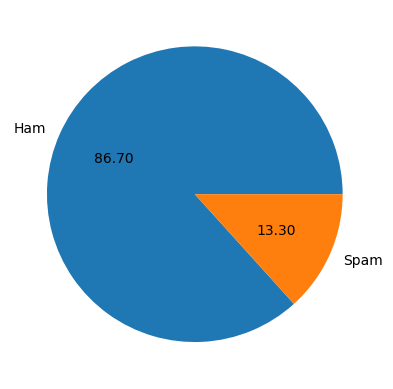

In [22]:
import matplotlib.pyplot as plt
plt.pie(df.target.value_counts(),labels=["Ham","Spam"],autopct="%0.2f")
plt.show()

In [23]:
# Upsampling: 

In [24]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [25]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [26]:
df=pd.concat([df_majority,df_minority_upsampled])

In [27]:
df.target.value_counts()

target
0    4516
1    4516
Name: count, dtype: int64

In [28]:
import nltk

In [29]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
df["Characters"]=df.text.apply(len)

In [31]:
df

,target,text,Characters
10,0,"Go until jurong point, crazy.. Available only ...",111
11,0,Ok lar... Joking wif u oni...,29
13,0,U dun say so early hor... U c already then say...,49
14,0,"Nah I don't think he goes to usf, he lives aro...",61
16,0,Even my brother is not like to speak with me. ...,77
...,...,...,...
4760,1,Your weekly Cool-Mob tones are ready to downlo...,160
3976,1,YOU HAVE WON! As a valued Vodafone customer ou...,135
3914,1,Do you want a new video handset? 750 anytime a...,145
3800,1,"Twinks, bears, scallies, skins and jocks are c...",156


In [32]:
df["Words"]=df.text.apply(lambda row:len(nltk.word_tokenize(row)))

In [33]:
df["Sentences"]=df.text.apply(lambda row:len(nltk.sent_tokenize(row)))

In [34]:
df

,target,text,Characters,Words,Sentences
10,0,"Go until jurong point, crazy.. Available only ...",111,24,2
11,0,Ok lar... Joking wif u oni...,29,8,2
13,0,U dun say so early hor... U c already then say...,49,13,1
14,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
16,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
4760,1,Your weekly Cool-Mob tones are ready to downlo...,160,41,1
3976,1,YOU HAVE WON! As a valued Vodafone customer ou...,135,28,4
3914,1,Do you want a new video handset? 750 anytime a...,145,28,5
3800,1,"Twinks, bears, scallies, skins and jocks are c...",156,35,4


In [35]:
df[df.target==1][["Characters","Words","Sentences"]].describe()

,Characters,Words,Sentences
count,4516.000000,4516.000000,4516.000000
mean,136.130425,27.521922,2.978299
std,31.040317,6.999554,1.463311
min,13.000000,2.000000,1.000000
25%,127.000000,25.000000,2.000000
50%,147.000000,28.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns

<Axes: xlabel='Characters', ylabel='Count'>

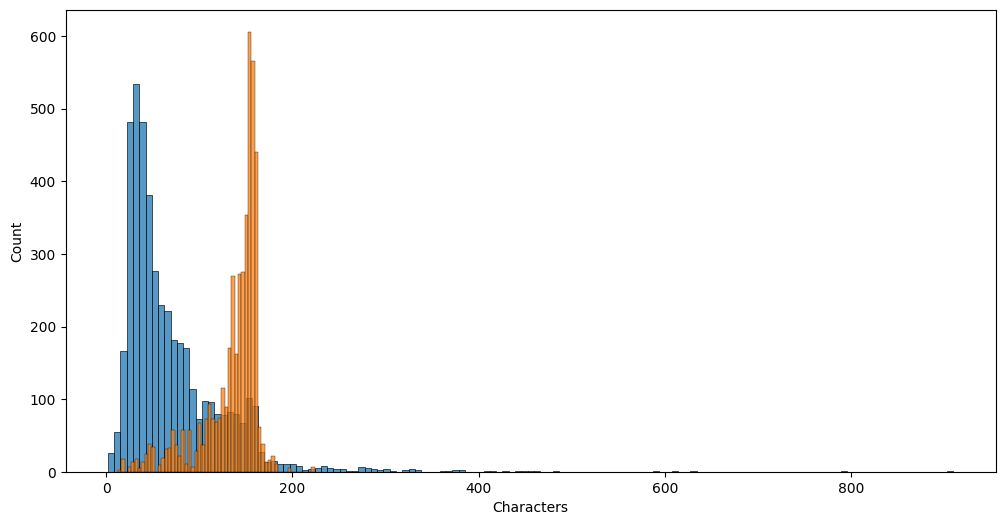

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["Characters"])
sns.histplot(df[df["target"]==1]["Characters"])

<Axes: xlabel='Words', ylabel='Count'>

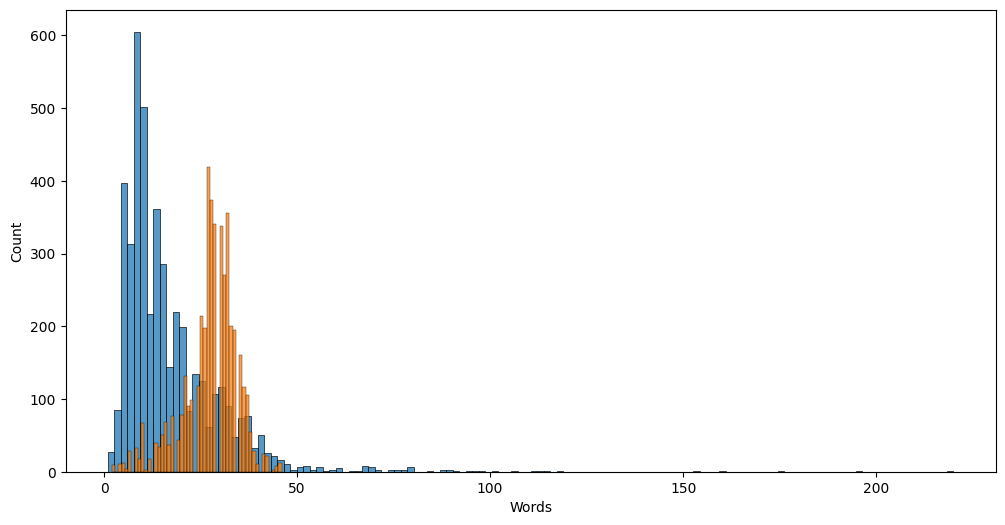

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["Words"])
sns.histplot(df[df["target"]==1]["Words"])

<Axes: xlabel='Sentences', ylabel='Count'>

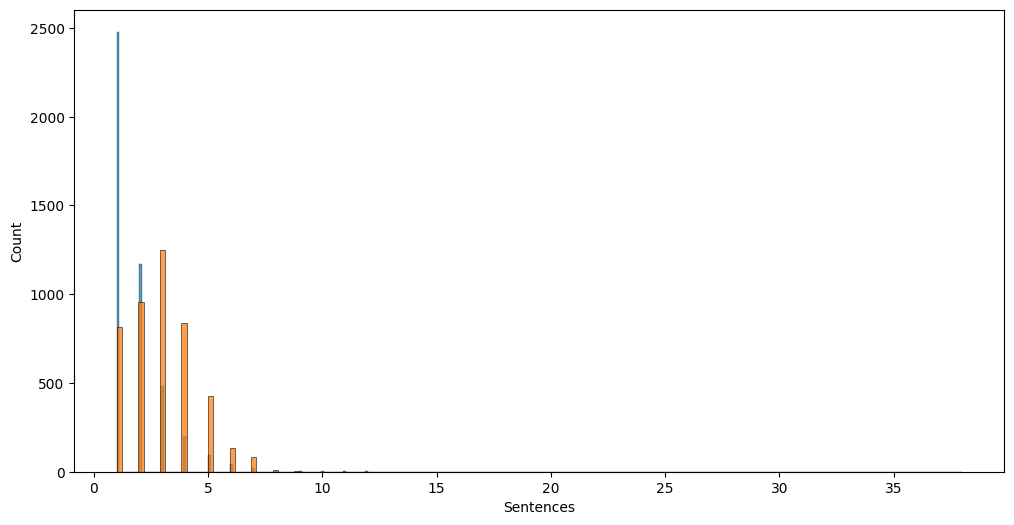

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["Sentences"])
sns.histplot(df[df["target"]==1]["Sentences"])

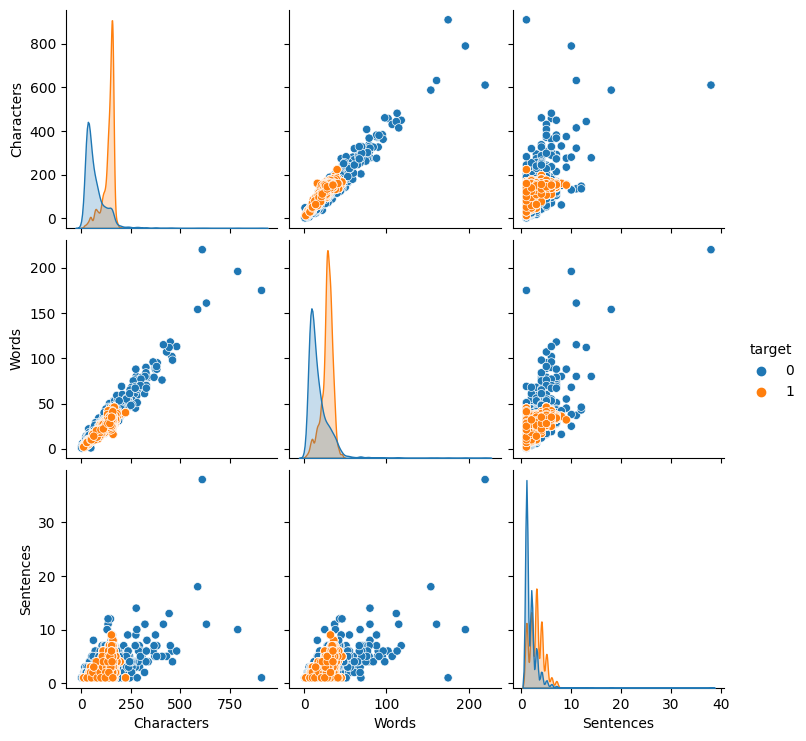

In [40]:
sns.pairplot(df,hue="target")

In [41]:
df.select_dtypes(include=["number"]).corr()

,target,Characters,Words,Sentences
target,1.000000,0.585269,0.435461,0.376712
Characters,0.585269,1.000000,0.947811,0.580114
Words,0.435461,0.947811,1.000000,0.637286
Sentences,0.376712,0.580114,0.637286,1.000000


<Axes: >

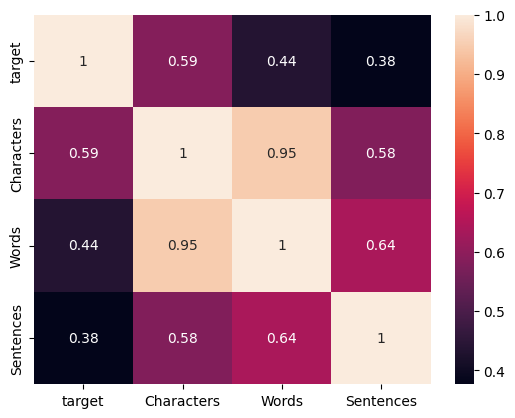

In [42]:
sns.heatmap(df.select_dtypes(include=["number"]).corr(),annot=True)

In [43]:
# remove stop words, puncutations and perform stemming

In [44]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
import string

In [46]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [47]:
def text_transformer(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [48]:
df["transformed_text"]=df.text.apply(text_transformer)

In [49]:
df

,target,text,Characters,Words,Sentences,transformed_text
10,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
11,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
13,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
14,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
16,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
...,...,...,...,...,...,...
4760,1,Your weekly Cool-Mob tones are ready to downlo...,160,41,1,weekli tone readi download week new tone inclu...
3976,1,YOU HAVE WON! As a valued Vodafone customer ou...,135,28,4,valu vodafon custom comput pick win prize coll...
3914,1,Do you want a new video handset? 750 anytime a...,145,28,5,want new video handset 750 anytim network min ...
3800,1,"Twinks, bears, scallies, skins and jocks are c...",156,35,4,twink bear scalli skin jock call miss weekend ...


In [50]:
from wordcloud import WordCloud

In [51]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [52]:
spam=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

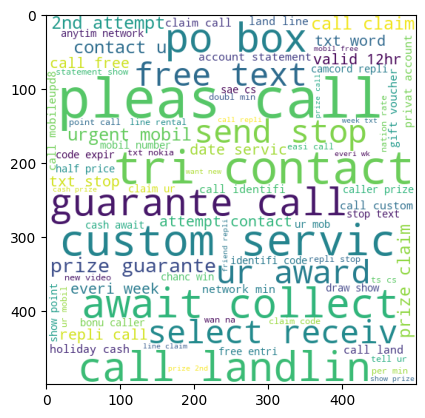

In [53]:
plt.imshow(spam)

In [54]:
ham=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

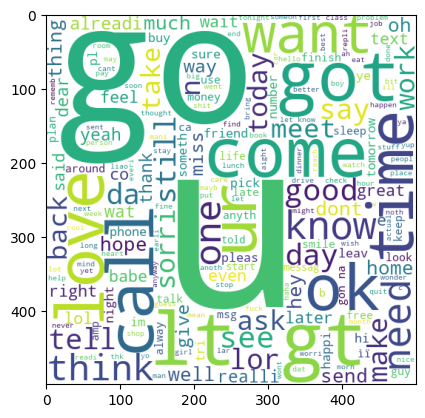

In [55]:
plt.imshow(ham)

In [56]:
spam_corpus=[]
for i in df[df["target"]==1]["transformed_text"].tolist():
    for w in i.split():
        spam_corpus.append(w)

len(spam_corpus)

66827

In [57]:
spam_corpus

['privat',
 '2003',
 'account',
 'statement',
 'show',
 '800',
 'point',
 'call',
 '08715203694',
 'identifi',
 'code',
 '40533',
 'expir',
 'heard',
 'u4',
 'call',
 'night',
 'knicker',
 'make',
 'beg',
 'like',
 'u',
 'last',
 'time',
 '01223585236',
 'xx',
 'luv',
 'call',
 '08702490080',
 'tell',
 'u',
 '2',
 'call',
 '09066358152',
 'claim',
 'prize',
 'u',
 '2',
 'enter',
 'ur',
 'mobil',
 'person',
 'detail',
 'prompt',
 'care',
 'get',
 'ur',
 '1st',
 'rington',
 'free',
 'repli',
 'msg',
 'tone',
 'gr8',
 'top',
 '20',
 'tone',
 'phone',
 'everi',
 'week',
 'per',
 'wk',
 '2',
 'opt',
 'send',
 'stop',
 '08452810071',
 '16',
 'someon',
 'contact',
 'date',
 'servic',
 'enter',
 'phone',
 'fanci',
 'find',
 'call',
 'landlin',
 '09111032124',
 'pobox12n146tf150p',
 'sm',
 'ac',
 'sptv',
 'new',
 'jersey',
 'devil',
 'detroit',
 'red',
 'wing',
 'play',
 'ice',
 'hockey',
 'correct',
 'incorrect',
 'end',
 'repli',
 'end',
 'sptv',
 'win',
 'shop',
 'spree',
 'everi',
 'week',


In [58]:
from collections import Counter

In [59]:
Counter(spam_corpus)

Counter({'call': 2097,
         'free': 1299,
         '2': 984,
         'txt': 859,
         'u': 817,
         'ur': 767,
         'text': 762,
         'mobil': 746,
         'claim': 691,
         'stop': 684,
         'repli': 669,
         '4': 656,
         'get': 575,
         'prize': 555,
         'servic': 440,
         'new': 424,
         'send': 390,
         'contact': 382,
         'award': 373,
         'tone': 372,
         'nokia': 368,
         'urgent': 360,
         'pleas': 334,
         'cash': 326,
         'phone': 324,
         'week': 317,
         'min': 307,
         'offer': 305,
         'custom': 296,
         'collect': 293,
         'tri': 292,
         'win': 288,
         'guarante': 284,
         'per': 282,
         'c': 280,
         'number': 259,
         'cs': 254,
         'messag': 237,
         'msg': 228,
         'receiv': 227,
         'chat': 225,
         'draw': 222,
         'today': 214,
         'line': 209,
         'latest': 205

In [60]:
data=pd.DataFrame(Counter(spam_corpus).most_common(30))

<Axes: xlabel='0', ylabel='1'>

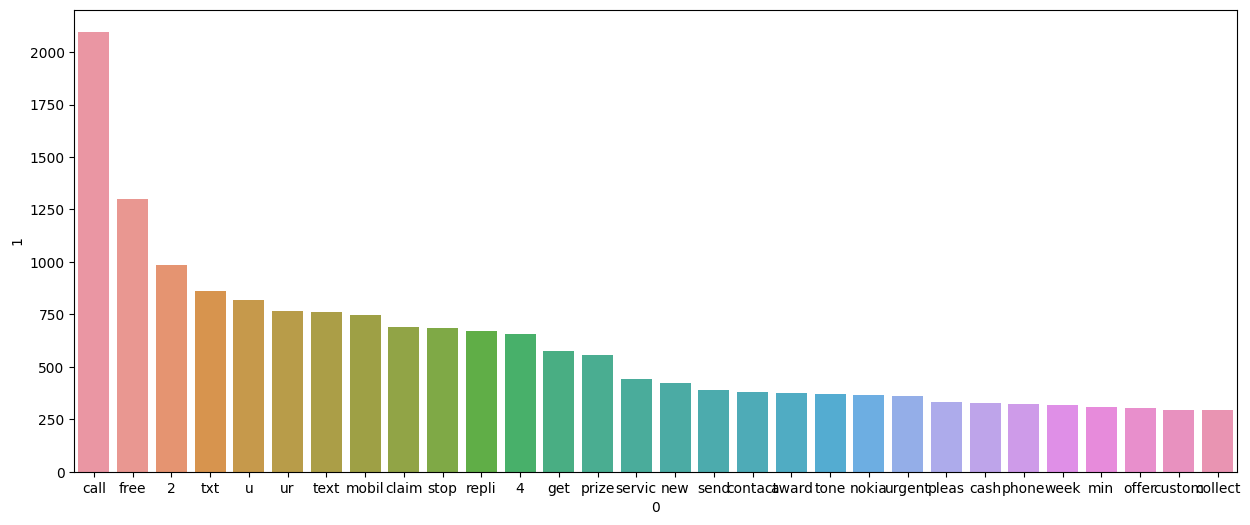

In [61]:
plt.figure(figsize=(15,6))
sns.barplot(data,x=0,y=1)

In [62]:
ham_corpus=[]
for i in df[df["target"]==0]["transformed_text"].tolist():
    for w in i.split():
        ham_corpus.append(w)

len(ham_corpus)

35404

In [63]:
new=pd.DataFrame(Counter(ham_corpus).most_common(30))

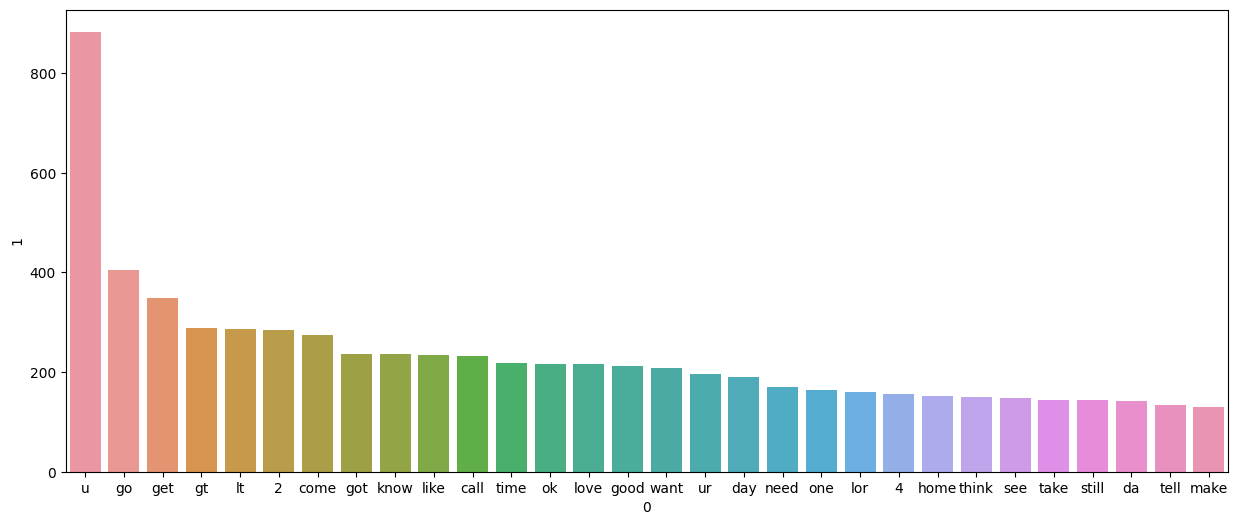

In [64]:
plt.figure(figsize=(15,6))
sns.barplot(new,x=0,y=1)
plt.show()

In [65]:
# Naive Bayes: 
# NLP : Vectorization : 
# Classification Algorithm : 
# Confusion Matrix

In [66]:
# Model Building

In [67]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [68]:
tfidf=TfidfVectorizer(max_features=3000)

In [69]:
cv=CountVectorizer(max_features=3000)

In [70]:
x=tfidf.fit_transform(df["transformed_text"]).toarray()

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [72]:
x=scaler.fit_transform(x)

In [73]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
x.shape

(9032, 3000)

In [75]:
y=df["target"].values

In [76]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [79]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [80]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [81]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9679026009961261
[[885  32]
 [ 26 864]]
0.9642857142857143


In [82]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9717764250138351
[[892  25]
 [ 26 864]]
0.9718785151856018


In [83]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9806308799114555
[[917   0]
 [ 35 855]]
1.0


In [84]:
# Other Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [85]:
svc=SVC(kernel="sigmoid",gamma=1.0)
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver="liblinear",penalty="l1")
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [86]:
clfs={"SVC":svc,"KN":knc,"NB":mnb,"DT":dtc,"LR":lrc,"RF":rfc,
      "AdaBoost":abc,"Bgc":bc,"ETC":etc,"GBC":gbc,"XGB":xgb}

In [87]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [88]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9457664637520753, 0.9304347826086956)

In [89]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    ac,prec=train_classifier(clf,x_train,y_train,x_test,y_test)
    accuracy_scores.append(ac)
    precision_scores.append(prec)
    print("For : ",name)
    print("Accuracry : ",ac)
    print("Precision : ",prec)

For :  SVC
Accuracry :  0.9457664637520753
Precision :  0.9304347826086956
For :  KN
Accuracry :  0.9706696181516326
Precision :  0.99880810488677
For :  NB
Accuracry :  0.9717764250138351
Precision :  0.9718785151856018
For :  DT
Accuracry :  0.843940232429441
Precision :  0.9380403458213257
For :  LR
Accuracry :  0.9922523519645822
Precision :  0.9888392857142857
For :  RF
Accuracry :  0.9966795794133924
Precision :  0.9944071588366891
For :  AdaBoost
Accuracry :  0.9396790260099612
Precision :  0.966547192353644
For :  Bgc
Accuracry :  0.9784172661870504
Precision :  0.9590075512405609
For :  ETC
Accuracry :  0.9983397897066962
Precision :  0.9977553310886644
For :  GBC
Accuracry :  0.90868843386829
Precision :  0.9503105590062112
For :  XGB
Accuracry :  0.96956281128943
Precision :  0.9749715585893061


In [91]:
all_models_performances=pd.DataFrame({"Algorithms":clfs.keys(),
                                      "Accuracy":accuracy_scores,"Precision":precision_scores})

In [92]:
all_models_performances

,Algorithms,Accuracy,Precision
0,SVC,0.945766,0.930435
1,KN,0.970670,0.998808
2,NB,0.971776,0.971879
3,DT,0.843940,0.938040
4,LR,0.992252,0.988839
5,RF,0.996680,0.994407
6,AdaBoost,0.939679,0.966547
7,Bgc,0.978417,0.959008
8,ETC,0.998340,0.997755
9,GBC,0.908688,0.950311


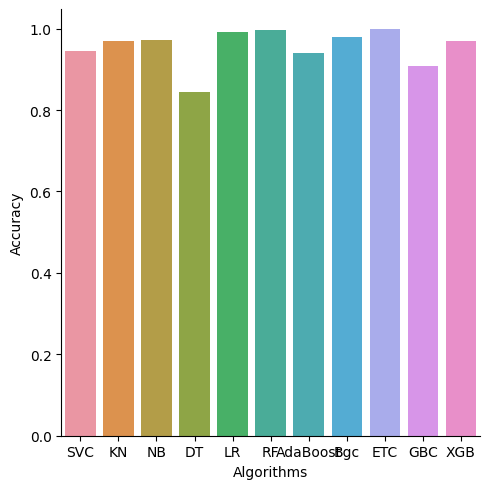

In [101]:
sns.catplot(all_models_performances,x="Algorithms",y="Accuracy",kind="bar")

In [103]:
new=pd.melt(all_models_performances,id_vars=["Algorithms"])

In [104]:
new

,Algorithms,variable,value
0,SVC,Accuracy,0.945766
1,KN,Accuracy,0.970670
2,NB,Accuracy,0.971776
3,DT,Accuracy,0.843940
4,LR,Accuracy,0.992252
5,RF,Accuracy,0.996680
6,AdaBoost,Accuracy,0.939679
7,Bgc,Accuracy,0.978417
8,ETC,Accuracy,0.998340
9,GBC,Accuracy,0.908688


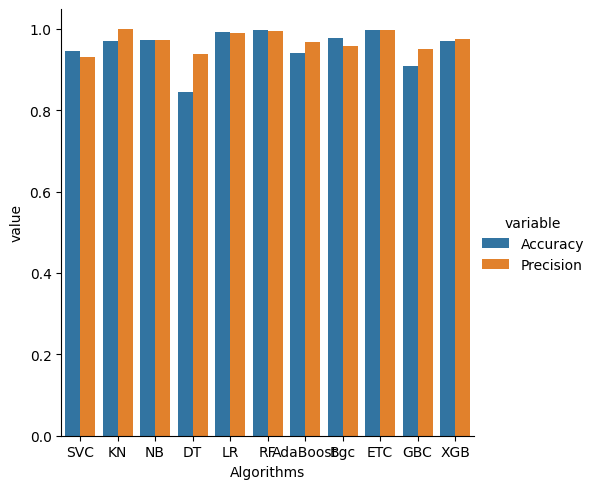

In [106]:
sns.catplot(new,x="Algorithms",y="value",kind="bar",hue="variable")